# Monte Carlo Simulations

A Monte Carlo Simulation is any physical simulation making use of random numbers. You've already writen the code for two simple Monte Carlo simulations: 

1. The decay of Thallium into lead
2. The Rutherford scattering of alpha particles off a gold atom

A field of physics which makes significant use of Monte Carlo simulations is statistical mechanics (they are also frequently used in astrophysics - I have most often encountered them around the generation of mock catalogues used to simulate astronomical surveys). 



Using statistical mechanics as an example application, a common goal is to compute the average of some quantity in a system (e.g., the pressure in a gas) in thermal equilibrium at temperature $T$ (in kelvins).  Statistical mechanics theory tells us that while we cannot say specifically what state the system would be in (what all the particle speeds would be in a gas, for instance), the probability of its being in a state with energy $E_i$ is related to the "Boltzmann factor," $e^{-\beta E_i}$, via

\begin{equation}
P(E_i) = \dfrac{e^{-\beta E_i}}{Z} , (1)   
\end{equation}

where $\beta \equiv 1/k_B T$ ($k_B$ is "Boltzmann's constant") and $Z \equiv \sum_i e^{-\beta E_i}$ is the "partition function," involving a sum over all "microstates" of the system.  The average value of some quantity $X$, whose value in the $i^{\mathrm{th}}$ state is $X_i$, then is

\begin{equation}
\left<X\right> = \sum_i X_i \, P(E_i) . (2)   
\end{equation}

Usually, this sum cannot be determined analytically, so it must be computed numerically.  However, it would be prohibitively time-consuming, if not impossible, to do it directly, as the number of states involved typically is "astronomically" large.  MC techniques can come to the rescue here: the idea is to replace the complete sum by one over a smaller number of terms chosen randomly.  If we choose $N$ of the states, and designate them by the subscript $j$, then we can write

\begin{equation}
\left<X\right> \simeq \dfrac{\sum_{j=1}^N X_j P(E_j)}{\sum_{j=1}^N P(E_j)} ,   (3)
\end{equation}

where we have to include the denominator for normalization.  It was not needed in the previous expression because the probability is normalized for the full sum; i.e., $\sum_i P(E_i) = 1$ when *all* states $i$ are included.

It turns out that in this instance the simple approach of using a uniform sampling of states will give poor results: most of the states are associated with Boltzmann factors that are so small (since $E_j \gg k_B T$ for them) that they contribute a negligible amount to the sum.  In fact, most of the sum comes from a very small subset of the terms, most or all of which are likely to be missed in a uniform random sample.  Here's a situation where we should use importance sampling!  

### Importance Sampling 


The average above is expressible, in terms of weights $w_i$ that we choose, as

\begin{equation}
<X> \simeq \dfrac{1}{N} \sum_{j=1}^N \dfrac{X_j P(E_j)}{w_j} \sum_{i} w_i , (4)  
\end{equation}

where the last sum is over *all* of the states, and normally is computed analytically.  

The aim now is to choose the weights $w_i$ to pick out the large $P(E_i)$ terms in the sum, and such that the sum of the $w_i$ can be determined analytically.  But this is easy: we simply take $w_i = P(E_i)$ which, by Eq. (1), are normalized, $\sum_i w_i = \sum_i P(E_i) = 1$.  Then, the previous expression becomes

\begin{equation}
<X> \simeq \dfrac{1}{N} \sum_{j=1}^N X_j . (5)
\end{equation}

This is telling us that to average $X$, we just choose $N$ states in proportion to their Boltzmann probabilities; i.e., their likelihood of occurring.  (Of course, the more states we use, the more accurate the approximation.)  This averaging process is a simulation of the actual physical process in that the system will find itself most often in the states having the highest probabilities, so an average of a quantity $X$ in the system will be dominated by the values in the most probable states, just as in the average we've constructed.

### Markov Chains

There's a complication here: the probabilities $P(E_i)$ depend on the partition function $Z$, which we usually don't know *a priori* and which often is difficult to calculate numerically due to the large number of states involved, as mentioned earlier.  It is, however, possible to choose the probabilities without knowing $Z$, using a powerful model for random processes known as a ***Markov chain***, named after Russian mathematician Andrei Markov.  


(ASIDE: The Wikipedia page for Markov chain lists numerous applications, including to the modeling of chemical reactions, to speech recognition systems, macroeconomic and population genetics models, and even Google's PageRank algorithm. It is also frequently used in astronomical applications such as statistics of large scale structure, fitting cosmological parameters to data and many others). 

A Markov chain represents a random process in which a system transitions through a sequence of connected ***states*** (analogous to links in a chain), the sequence being determined by ***transition probabilities*** $T_{ij}$ from state $i$ to state $j$ which are *independent of the previous states in the chain*.  That is, in a Markov chain $T_{ij}$ depends only on the current state $i$ and the next state $j$.  

In the present application, the states in the Markov chain will correspond to actual states of our physical system.  For a long enough chain, the probability of *being in* a particular state will be the same as the probability of *transitioning to* that state.  The idea, then, is to choose the $T_{ij}$ such that the probability of transitioning into any particular state $i$ on any step in the chain is the Boltzmann probability for that state, $P(E_i)$.  

In order for the $T_{ij}$ to satisfy this condition, we first note that the $T_{ij}$ will be normalized according to $\sum_j T_{ij} = 1$, since the system must transition to *some* state from the $i^{\mathrm{th}}$ one.  We then choose the $T_{ij}$ so that they satisfy

\begin{equation}
\dfrac{T_{ij}}{T_{ji}} = \dfrac{P(E_j)}{P(E_i)} = \dfrac{e^{-\beta E_j} / Z}{e^{-\beta E_i} / Z} = e^{-\beta (E_j - E_i)}.    \hspace{50pt}  (6)  
\end{equation}

Note that the partition function $Z$ has been eliminated from this result, so it will not need to be calculated.  

It is not hard to prove (alhtough long, so see Appendix D of Newman's Computational Physics) that using this technique, a system started in any random state will evolve to the Boltzman Distribution (if you wait long enough).  

### Metropolis Algorithms

We still need to work out what $T_{ij}$ should be (the transition probabilities we will use). One common method to do this is known as the ***Metropolis algorithm*** (also known as the Metropolis-Hastings algorithm), named after Nicholas Metropolis who was involved in its development. 

Suppose that we start with the system in state $i$, and consider making a small change that would put the system in state $j$; e.g., by changing the energy of one gas particle.  (Note that the new state could be the same as the previous state; i.e., $T_{ii} \ne 0$, in general.  This would happen, for instance, if two gas particles collided elastically and interchanged  energies.)  The symbols $i$ and $j$ here designate steps in the Markov chain rather than particular states of the system.)  The Metropolis algorithm instructs us to accept such a change with an ***acceptance probability*** 

\begin{equation}
  P_a = 
  \begin{cases}
    1 & \mathrm{if} \hspace{1mm} E_j \le E_i , \\
    e^{-\beta (E_j - E_i)}  & \mathrm{if} \hspace{1mm} E_j > E_i . (7)
  \end{cases}  
\end{equation}

The idea here is that the system always will "choose" to go to a state with equal or lower energy than the current state, but it also may move to a state of higher energy, with some probability dependent on the temperature (through $\beta = 1/k_B T$).  (If this didn't happen, numerical models of thermodynamic systems would always result in them evolving directly to their ground state which, in fact, doesn't happen due to thermal excitations.)  In the second case above, the probability of transitioning to a state of higher energy is inversely related to the change in energy (the exponential factor becomes smaller as $E_j - E_i$ grows), and it's also inversely related to $T$ (smaller $T$ leads to a larger negative exponent and therefore a smaller exponential factor).  This simulated behavior is designed to match what we expect to happen physically: it's more likely for our system to jump to a higher energy if it's in a higher-temperature environment than a lower temperature environment, but the jump is less likely for a larger energy difference.

To convert the acceptance probability into a transition probability, suppose that the number of possible changes to the system is $M$.  Then the probability of transitioning from state $i$ to state $j$ is the probability of choosing a particular change (which would be just $1/M$), times the probability that we accept that change.  This lets us write the transition probabilities as

\begin{equation}
\begin{cases}
T_{ij} = \dfrac{1}{M} \times e^{-\beta (E_j - E_i)} \hspace{3mm} \mathrm{and} \hspace{3mm} T_{ji} = \dfrac{1}{M} \times 1 , & \hspace{5mm} \mathrm{if} \hspace{1mm} E_j > E_i ;  \\[2ex]
T_{ij} = \dfrac{1}{M} \times 1 \hspace{3mm} \mathrm{and} \hspace{3mm} T_{ji} = \dfrac{1}{M} \times e^{-\beta (E_i - E_j)} , & \hspace{5mm} \mathrm{if} \hspace{1mm} E_j \le E_i . 
\end{cases} (8)
\end{equation}

then it is true that

\begin{equation}
\frac{T_{ij}}{T_{ij}} = \frac{e^{-\beta (E_j - E_i)}/M}{1/M} =  e^{-\beta (E_j - E_i)} (9)
\end{equation}

which is what we need. 

### Markov Chain Monte Carlo Simulation 

Now that we have identified all of the pieces, we can spell out the ***Markov Chain Monte Carlo*** (MCMC) simulation method (AKA fancy terms for something quite simple which will make you sound very clever):

1.  Choose a starting state (must be physically allowed, but otherwise this is up to you) 
<br>

2.  Select a change to the system at random from among the set of possible changes, and compute the change in energy from the previous state. 
<br>

3.  Compute the corresponding acceptance probability $P_a$ from Equation (7) above using the energy change. Accept the change with probability $P_a$---i.e., with that probability change to the new state; otherwise, reject the change.
<br>

4. Compute and store the value of the quantity (or quantities) of interest in the current state. 
<br>

5. Repeat from step 2.

Step 3 of the sequence can be implemented by using `np.random.random()` to obtain a random number $z$ and comparing it with $e^{-\beta (E_j - E_i)}$; if $z < e^{-\beta (E_j - E_i)}$, then the change to the new state is made; if not, the change is rejected and the system remains in the same state.  (The larger $e^{-\beta (E_j - E_i)}$ is, the more likely $z$ is to be less than it and the more likely the change is to be accepted.)

It's important to emphasize a few points about the MCMC approach: 

1. Even if a change of state is rejected and the system remains in its current state, that still counts as a "step" in the Markov chain, and therefore the value of any quantity of interest that's being recorded should be recorded again (and/or again added to any sum of its values).  
<br>

2. In order for Eq. (9) to hold, the number of changes to the system that are available in going from state $i$ to state $j$ must be the same number that would be available in making the reverse change.  This might require careful selection of the set of possible state changes.  
<br>

3. It must be possible eventually to get to any state; this property of the system, known as ***ergodicity***, is a requirement for the Metropolis algorithm to work.  
<br>

4. While the Markov chain process always will converge to the correct Boltzmann probability distribution, there's no way to predict how many steps that will take; i.e., how long it will take for the system to ***equilibrate***.  Basically, one determines when equilibration has been achieved by looking for minimal or no changes in the output values. 

### Example: MCMC Simulation of an Ideal Gas

In an ideal gas of N atoms, the total energy of the system is the sum of the energies of the particles

$$ E = \sum^N_{i=1} E(n_x^{(i)},n_y^{(i)},n_z^{(i)}),$$

where in a cubic box of length, $L$ an atom of mass, $m$ has energy given by

$$ E(n_x,n_y,n_z) = \frac{\pi^2 \hbar^2}{2mL^2} (n_x^2 + n_y^2 +n_z^2) $$

For our MCMC we will choose to: 

1. Move a single atom into a neighbouring set (i.e. $n_x$, $n_y$ or $n_z$ changes by $\pm1$). 

When this happens the change in energy is (for example for $n_x$ changing to $n_x+1$): 

$$ \Delta E = \frac{\pi^2 \hbar^2}{2mL^2} ((n_x \pm 1)^2 + n_y^2 +n_z^2) - \frac{\pi^2 \hbar^2}{2mL^2} (n_x^2 + n_y^2 +n_z^2) $$

which simplifies to: 

$$ \Delta E = \frac{\pi^2 \hbar^2}{2mL^2} (\pm 2n_x + 1). $$

(and the equivalent for changes in $n_y$ or $n_z$). 

2. We will simulated N = 1000 particles, for $k_B T = 1$ and work in theorists units ($m = \hbar = 1$, and $L = 1$). 

3. We will start in the "ground state" $N_x = n_y = n_z = 1$. 

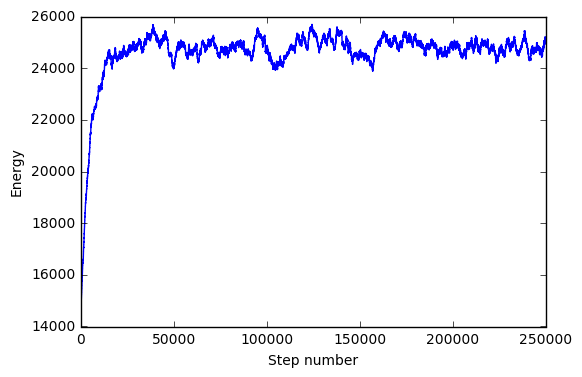

In [9]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
#This for Notebook display
%matplotlib inline 

T = 10.0
N = 1000
steps = 250000

#Array of integers to store quantum numbers

n = np.ones([N,3],int)

#Main loop
eplot=[]
E=3*N*np.pi*np.pi/2

for k in range(steps):
    #Choose the particle and state to move
    i=rnd.randint(N) #Random integer from 0 to N-1
    j=rnd.randint(3) #Random integer from 0 to 2
    #Choose if to go +1 or -1 (50-50)
    if rnd.random()<0.5: 
        dn = 1
        dE = (2*n[i,j]+1)*np.pi*np.pi/2
    else:
        dn=-1
        dE=(-2*n[i,j]+1)*np.pi*np.pi/2
        
    #Decide if move should be accepted. 
    #If energy is not going to be reduced (ie. n=n+1 or we're in the ground state) just keep current state
    if n[i,j]>1 or dn==1: 
        #Now calculate acceptance probability, and keep new state if random number is less than this
        if rnd.random()<np.exp(-dE/T):
            n[i,j] += dn
            E += dE
            
    #Save the state    
    eplot.append(E)

#Make a graph of energy steps

plt.plot(eplot)
plt.ylabel("Energy")
plt.xlabel("Step number")
plt.show()

Comments: 

* This code runs quickly, and equilibrates after about 50,000 steps.
* The average of the energy after this point would give an estimate of the energy of the system (in the dimensionless units we chose)
* We could speed this up by accepting all steps where dE is negative (ie. remove the probability calculation)

### Take Away Points about MCMC

Definitions: 

* Monte Carlo Simulation - a simulation of a physical system using random numbers
* Markov Chain - a series of steps through states of a system with some probability
* Metropolis Alogorithm  - a way to chose what steps to keep and which not to (based on the change of energy of the states)
* MCMC - doing all of this at once. 

To summarize: 

* It's not as complicated as it sounds
* You already know how to do it
* So let's have a go at an interesting application

### Simulated Annealing

Annealing is the process of cooling materials slowly enough that their atoms/molecules are able to order themselves before the material cools enough to freeze. This process has been used for centuries by glass and metal works to create stronger materials. 

Simulated annealing refers to doing this in your code. It provides a way to identify global minimima in system with complex likelihood surfaces. 

![Global Minima](globalminima.jpg "Global Minima")

The process is as follows: 

* Create a Monte Carlo Simulation of your system (or function) with a high temperature
* Gradually decrease the temperature to find the global minima

Many of the applications of this process are not in physics, but real world simulations with many parameters, like optimizing car fuel consumption, traveling salesman problems etc. 

So how slow is slow enough? Well there is no correct answer. Often the system is set up with a temperature high enough that it reach equillibrium really quickly, and then the temperature is dropped as 

$$ T = T_0 e^{-t/\tau}$$

where $\tau$ is chosen by trial and error. This is another place in computational physics where you have to make a trade off between accuracy/the best answer, and computing power. If $\tau$ is too large the code may take too long to run, but if it's too small you may not get to the global minimum.... 

### Genetic Algorithms

Another effective optimization method inspired by the real world, which goes by the name ***genetic programming*** (based on ***genetic algorithms***).  

This approach adopts the biological concepts of mutation, inheritance, and natural selection, and applies them to possible solutions to an optimization problem.  

The idea is to start with a group of candidate solutions, evaluate their "fitness" as solutions to the problem, and then "mutate" them to try to improve their fitness.


### Class Exercise - the Classic "Traveling Salesperson" Problem

Find the shortest route which visits a set of N locations 

![Traveling Salesperson](512px-GLPK_solution_of_a_travelling_salesman_problem.svg.png "Traveling Salesperson")


Example applications: 
   * shortest route to fly between N cities
   * shortest route for postal worker to deliver to N houses
   * shortest route to pick up your N friends in a bus
   * shortest route to visit N tourist attractions in a city
   
This is a classic problem for computer scientists and computational physicists alike. 

Set up the problem as follows: 

1. Denote the position of location i with a 2D vector, $r_i = (x_i, y_i)$. 
2. Randomly select $N$ positions, $r_i$ (start with a small value of $N$)
3. Make a plot of the $N$ locations
4. Start by visiting the locations in the order you set them up, calculating the total distance travelled as 

$$ D = \sum^{N-1}_{i=0} | \bf{r}_{i+1} - \bf{r}_i | $$

Run the simulation: 

Now use an MCMC with Simulated Annealing to find the shorted route. 

In (hopefully) plain English: 
  1. Swap two randomly selected cities
  2. If the swap shortens the tour keep it, if not keep it with the Metropolis probability for a "temperature" T and an "energy" $E = D$ (ie. keep if the probability, P is 
  
  $$ P \lt e^{\Delta D/T}$$
  
for some value of $T$ you have chosen.
  3. Now reduce $T$ to simulate annealing according to your "cooling schedule" $ T = T_0 e^{-t/\tau}$ (you have to pick a value of $\tau$ and $t$ for your time step also). 
  4. Repeat
  5. Make a plot showing the final route
  
Tips/good starting points (but experiment!)

* N = 10 will run in a reasonable time. 
* Write functions to calculate the total distance, and the length (magnitude) of a vector.  
* ```r=np.empty([N+1,2],float)``` will define an (N+1)x 2 array. 
* You can plot this using ```plt.plot(r[:,0],r[:,1]```
* Don't forget to go back to the beginning location at the end 
* When swapping locations don't forget to check they are different locations
* You may want to output every some number of steps to check progress. ```if t%5000==0:``` will do something every 5000th step. 
* Set a Tmin which is greater than zero (or there will be errors). For example try: 

```Tmax = 10.0
Tmin = 1e-3
tau = 2e4```

Once you are sure your code runs, trying timing it for different numbers of locations. You can try to use
```
import time
start_time = time.clock()
main()
print(time.clock() - start_time, "seconds")```
